# Implementing AdaBoost

When the trees in the forest are trees of depth 1 (also known as decision stumps) and we
perform boosting instead of bagging, the resulting algorithm is called AdaBoost.

AdaBoost adjusts the dataset at each iteration by performing the following actions:
- Selecting a decision stump
- Increasing the weighting of cases that the decision stump labeled incorrectly while reducing the weighting of correctly labeled cases

This iterative weight adjustment causes each new classifier in the ensemble to prioritize
training the incorrectly labeled cases. As a result, the model adjusts by targeting highlyweighted
data points.

Eventually, the stumps are combined to form a final classifier.

## Implementing AdaBoost in OpenCV

Although OpenCV provides a very efficient implementation of AdaBoost, it is hidden
under the Haar cascade classifier. Haar cascade classifiers are a very popular tool for face
detection, which we can illustrate through the example of the Lena image:

In [1]:
import cv2
img_bgr = cv2.imread('data/lena.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

After loading the image in both color and grayscale, we load a pretrained Haar cascade:

In [2]:
filename = 'data/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(filename)

The classifier will then detect faces present in the image using the following function call:

In [3]:
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

Note that the algorithm operates only on grayscale images. That's why we saved two
pictures of Lena, one to which we can apply the classifier (`img_gray`), and one on which we
can draw the resulting bounding box (`img_bgr`):

In [4]:
color = (255, 0, 0)
thickness = 2
for (x, y, w, h) in faces:
    cv2.rectangle(img_bgr, (x, y), (x + w, y + h),
                  color, thickness)

Then we can plot the image using the following code:

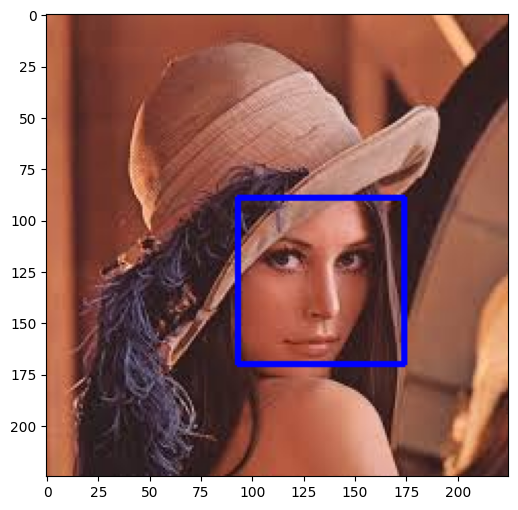

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB));

Obviously, this picture contains only a single face. However, the preceding code will work
even on images where multiple faces could be detected. Try it out!

## Implementing AdaBoost in scikit-learn

In scikit-learn, AdaBoost is just another ensemble estimator. We can create an ensemble
from 100 decision stumps as follows:

In [6]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,
                         random_state=456)

We can load the breast cancer set once more and split it 75-25:

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=456
)

Then fit and score AdaBoost using the familiar procedure:

In [9]:
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

/home/pewhite/github/aet/2024-2025/scratch/dev_env/env2/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9790209790209791

The result is remarkable, 97.9% accuracy!

We might want to compare this result to a random forest. However, to be fair, we should
make the trees in the forest all decision stumps. Then we will know the difference between
bagging and boosting:

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=1,
                                random_state=456)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9370629370629371

Of course, if we let the trees be as deep as needed, we might get a better score:

In [11]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=456)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.986013986013986